In [ ]:
#"C:\Users\zaema\Downloads\globalterrorismdb_0718dist.csv"


In [ ]:
import pandas as pd

# Replace 'path_to_your_file/global_terrorism.csv' with the actual path to your dataset
df = pd.read_csv('/mnt/data/global_terrorism.csv', encoding='ISO-8859-1', low_memory=False)


In [3]:
from google.colab import files
import pandas as pd
import io

# Upload files from your local system
uploaded = files.upload()

# The key of 'uploaded' is the file name, you can use it to read the file into a DataFrame
filename = next(iter(uploaded))
#df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='ISO-8859-1')


Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist (1).csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='ISO-8859-1',low_memory=False)

In [5]:
# Check for missing values
print(df.isnull().sum())


eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


drop the approxdate and related columns as they contain a huge number of missing values, and we do not need these columns

In [6]:
df.drop(['approxdate', 'related'], axis=1, inplace=True)


In [8]:
#  stats
print(df.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

In [9]:
#  the first few rows
print(df.head())

        eventid  iyear  imonth  iday  extended resolution  country  \
0  197000000001   1970       7     2         0        NaN       58   
1  197000000002   1970       0     0         0        NaN      130   
2  197001000001   1970       1     0         0        NaN      160   
3  197001000002   1970       1     0         0        NaN       78   
4  197001000003   1970       1     0         0        NaN      101   

          country_txt  region                   region_txt  ... nreleased  \
0  Dominican Republic       2  Central America & Caribbean  ...       NaN   
1              Mexico       1                North America  ...       NaN   
2         Philippines       5               Southeast Asia  ...       NaN   
3              Greece       8               Western Europe  ...       NaN   
4               Japan       4                    East Asia  ...       NaN   

  addnotes  scite1  scite2  scite3  dbsource INT_LOG INT_IDEO  INT_MISC  \
0      NaN     NaN     NaN     NaN      P

In [10]:
#  a list of columns for reference
print(df.columns)


Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'resolution',
       'country', 'country_txt', 'region', 'region_txt',
       ...
       'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object', length=133)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

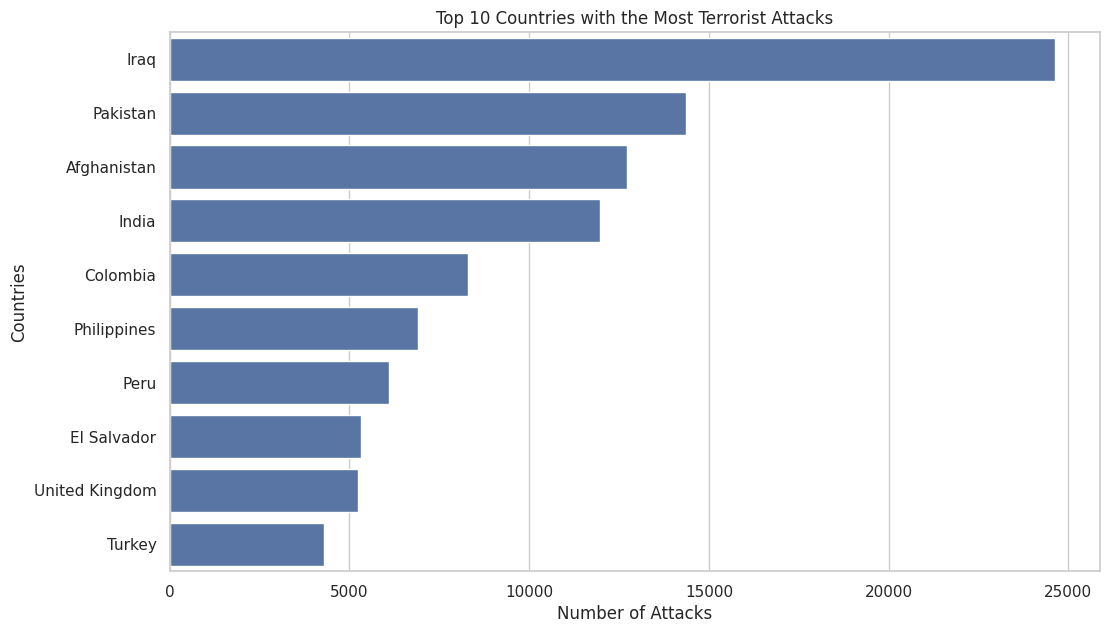

In [12]:
# Set up the visualisation settings
sns.set(style="whitegrid")

# Top 10 countries with the most terrorist attacks
plt.figure(figsize=(12,7))
sns.barplot(x=df['country_txt'].value_counts().head(10).values, y=df['country_txt'].value_counts().head(10).index)
plt.title('Top 10 Countries with the Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.show()


<ipython-input-13-66b9176fefeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='iyear', data=df, palette='RdYlGn', edgecolor=sns.color_palette('dark', 10))


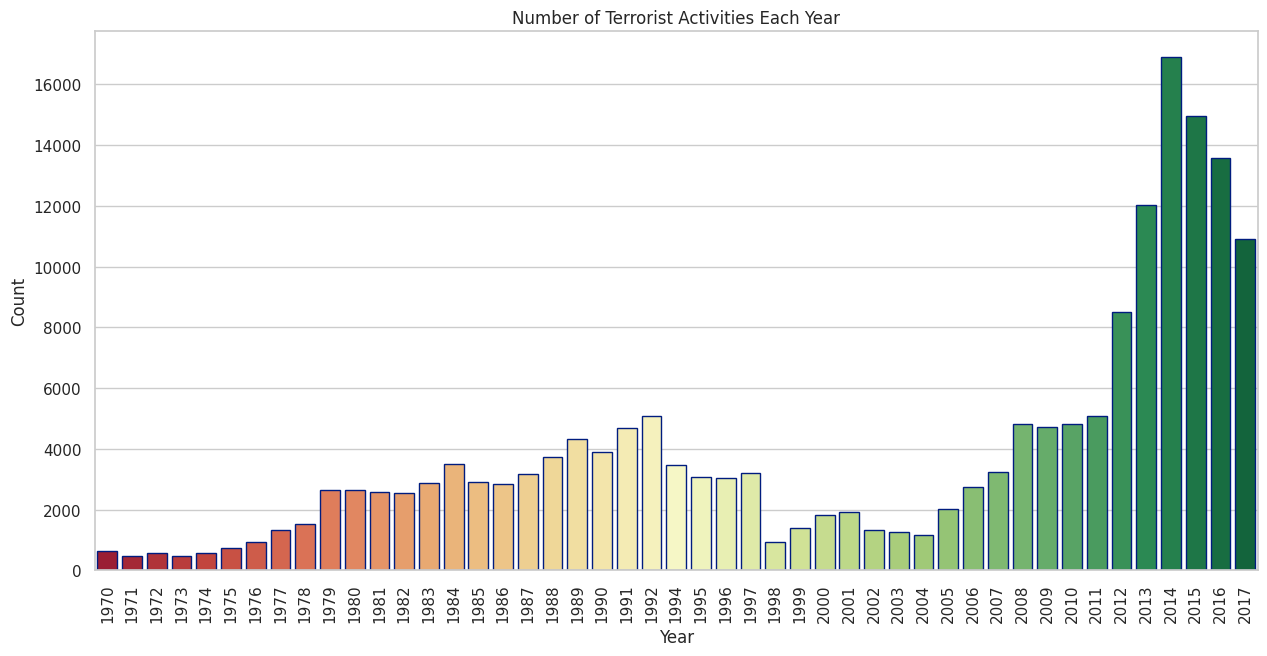

In [13]:
# Terrorist activities over the years
plt.figure(figsize=(15,7))
sns.countplot(x='iyear', data=df, palette='RdYlGn', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


<ipython-input-14-1054fd8a2bc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['attacktype1_txt'].value_counts().index, x=df['attacktype1_txt'].value_counts().values, palette='muted')


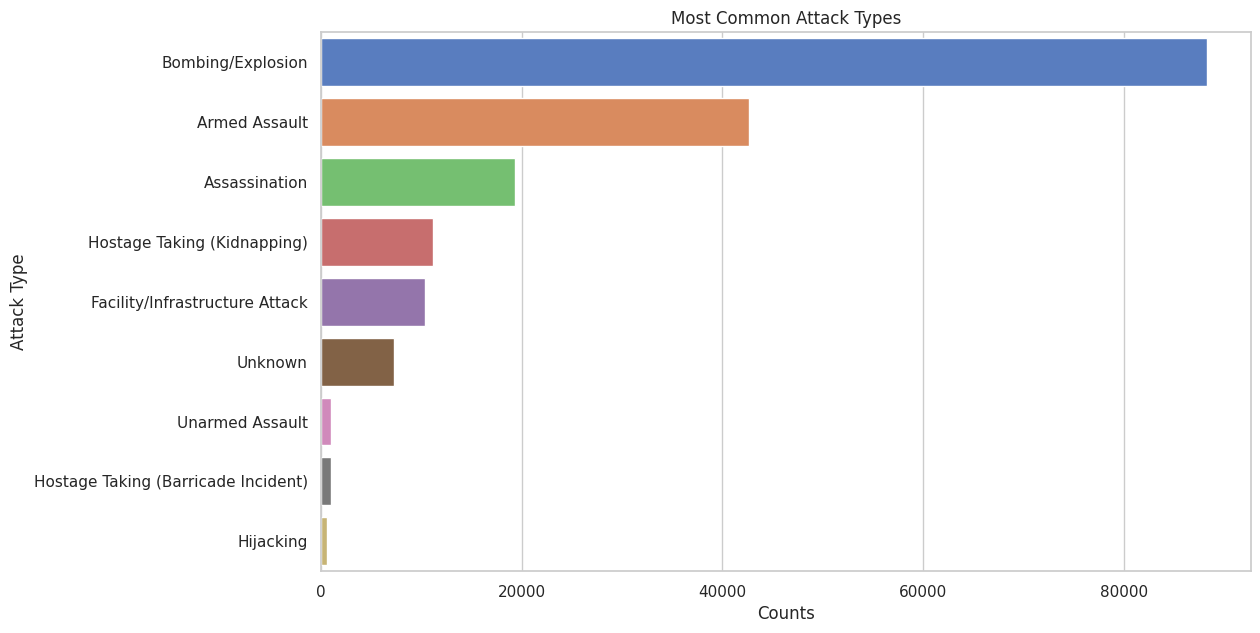

<ipython-input-14-1054fd8a2bc3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['targtype1_txt'].value_counts().head(10).index, x=df['targtype1_txt'].value_counts().head(10).values, palette='muted')


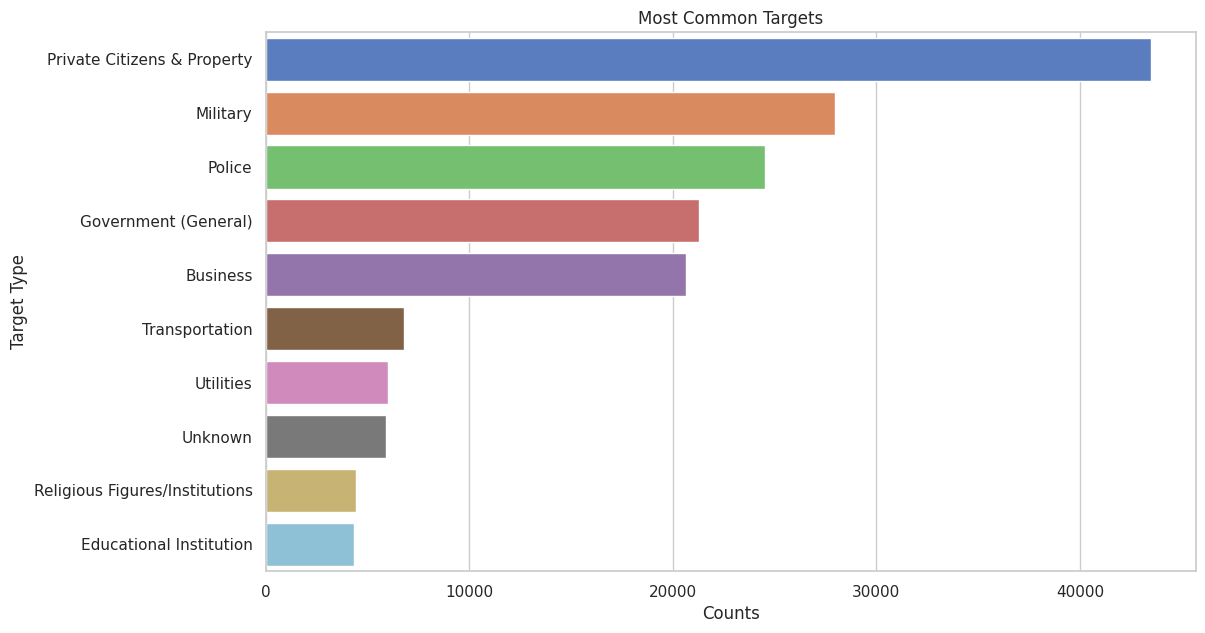

In [14]:
# Most common attack types
plt.figure(figsize=(12,7))
sns.barplot(y=df['attacktype1_txt'].value_counts().index, x=df['attacktype1_txt'].value_counts().values, palette='muted')
plt.title('Most Common Attack Types')
plt.xlabel('Counts')
plt.ylabel('Attack Type')
plt.show()

# Most common targets
plt.figure(figsize=(12,7))
sns.barplot(y=df['targtype1_txt'].value_counts().head(10).index, x=df['targtype1_txt'].value_counts().head(10).values, palette='muted')
plt.title('Most Common Targets')
plt.xlabel('Counts')
plt.ylabel('Target Type')
plt.show()


<ipython-input-19-8d53ee6f1a81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('iyear').sum()[['nkill', 'nwound']].plot(kind='bar', stacked=True, color=['red', 'blue'])


<Figure size 2500x2000 with 0 Axes>

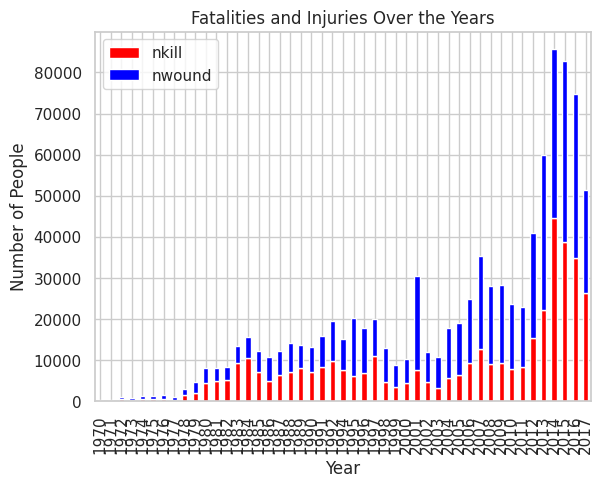

In [19]:
# Fatalities and Injuries over the years
plt.figure(figsize=(25,20))
df.groupby('iyear').sum()[['nkill', 'nwound']].plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title('Fatalities and Injuries Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.show()
